## 1. Import libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

dataset = pd.read_csv('Churn_Modelling.csv')
# CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

## 2. Encode Categorical data

Label Encode the "Gender" column and One Hot Encode the "Geography" column

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Gender encode
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])

# Geography column encode
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
# Geography (3), CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary
x = np.array(ct.fit_transform(x))

## 3. Preparing the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 4a. Train using Logistic Regression

This is akin to a single "Neuron".

Credits: [@kanncaa1](https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners)

<img src="https://sebastianraschka.com/images/faq/logisticregr-neuralnet/schematic.png" width="400" height="auto"/>

(Source: [Sebastian Raschka, n.d.](https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html))

In [346]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def euclidean_normalize(z, axis=0):
    return np.apply_along_axis(lambda a: np.sqrt(np.sum(np.power(a, 2))), axis, z)

def unit_step(y_values_pred):
    pred_avg = (np.min(y_values_pred) + np.max(y_values_pred)) / 2
    return y_values_pred.flatten() > pred_avg, pred_avg

class LogisticRegression:
    
    def __init__(self, x_dimension):
        self.weights = np.full((x_dimension), 0.01)
        self.bias = 0.0
        
    def activation_function(self, x_values):
        return sigmoid(np.dot(x_values, self.weights.T) + self.bias)

    def forward_propagation(self, x_values, y_values):
        # Use sigmoid activation function: Probabilistic value from 0-1
        y_computed = self.activation_function(x_values)
        # Use binary cross-entropy loss
        cost = np.sum(-y_values * np.log(y_computed) - (1 - y_values) * np.log(1 - y_computed)) / x_values.shape[1]        
        return y_computed, cost

    def backward_propagation(self, x_values, y_values, y_computed):
        y_derivative = y_computed - y_values
        # Apply linear combination (partial without sum) for each gradient * x input value
        x_values_gradient = np.array([x_values[i] * y_derivative[i] for i in range(x_values.shape[0])])
        # Sum all x input values which eventually divides by total rows
        x_values_hlc = np.array([np.sum(x_values_gradient[:,i]) for i in range(x_values_gradient.shape[1])]) / x_values.shape[0]

        # Derivative value of loss function with respect to weight
        weight_derivative = x_values_hlc / x_values.shape[1]

        # Derivative value of loss function with respect 
        bias_derivative = np.sum(y_derivative) / x_values.shape[1]
        return (weight_derivative, bias_derivative)

    def update_parameters(self, x_values, y_values, learning_rate=0.01, no_of_iterations=150):
        costs = []

        for i in range(no_of_iterations):
            y_computed, cost = self.forward_propagation(x_values, y_values)
            gradients = self.backward_propagation(x_values, y_values, y_computed)

            # Update weights and biases using gradient descent
            self.weights = self.weights - learning_rate * gradients[0]
            self.bias = self.bias - learning_rate * gradients[1]

            print(f'Cost for iteration {i + 1}: {cost}')
            costs.append(cost)

        return gradients, costs

    def predict(self, x_values):
        return np.array([self.activation_function([v]) for v in x_values])

model = LogisticRegression(x_train.shape[1])
_, costs = model.update_parameters(x_train, y_train, no_of_iterations=250)


Cost for iteration 1: 462.02618008671925
Cost for iteration 2: 355.0074026794641
Cost for iteration 3: 337.3645327392285
Cost for iteration 4: 337.1210814836616
Cost for iteration 5: 337.1042072379421
Cost for iteration 6: 337.0882018876999
Cost for iteration 7: 337.07220829303134
Cost for iteration 8: 337.0562204483935
Cost for iteration 9: 337.04023831111687
Cost for iteration 10: 337.02426187889915
Cost for iteration 11: 337.00829114971447
Cost for iteration 12: 336.9923261215391
Cost for iteration 13: 336.9763667923499
Cost for iteration 14: 336.9604131601241
Cost for iteration 15: 336.9444652228396
Cost for iteration 16: 336.9285229784746
Cost for iteration 17: 336.9125864250079
Cost for iteration 18: 336.8966555604188
Cost for iteration 19: 336.88073038268703
Cost for iteration 20: 336.86481088979286
Cost for iteration 21: 336.848897079717
Cost for iteration 22: 336.83298895044067
Cost for iteration 23: 336.8170864999456
Cost for iteration 24: 336.801189726214
Cost for iteration 

Cost for iteration 201: 334.07501115418614
Cost for iteration 202: 334.06009317254416
Cost for iteration 203: 334.04518051449605
Cost for iteration 204: 334.0302731781142
Cost for iteration 205: 334.0153711614717
Cost for iteration 206: 334.0004744626419
Cost for iteration 207: 333.9855830796988
Cost for iteration 208: 333.970697010717
Cost for iteration 209: 333.9558162537714
Cost for iteration 210: 333.94094080693753
Cost for iteration 211: 333.92607066829146
Cost for iteration 212: 333.91120583590975
Cost for iteration 213: 333.89634630786946
Cost for iteration 214: 333.88149208224814
Cost for iteration 215: 333.86664315712386
Cost for iteration 216: 333.85179953057525
Cost for iteration 217: 333.8369612006814
Cost for iteration 218: 333.822128165522
Cost for iteration 219: 333.8073004231771
Cost for iteration 220: 333.7924779717273
Cost for iteration 221: 333.77766080925386
Cost for iteration 222: 333.76284893383854
Cost for iteration 223: 333.7480423435634
Cost for iteration 224: 

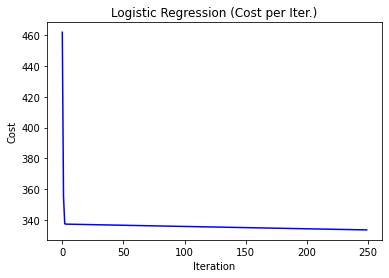

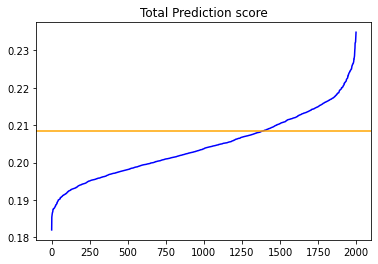

Divider:  0.20840556224738405


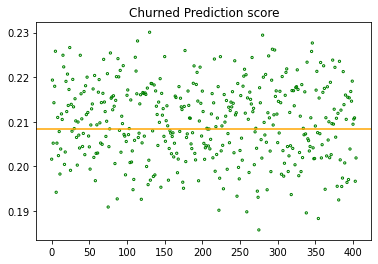

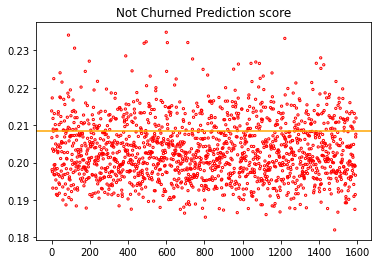

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


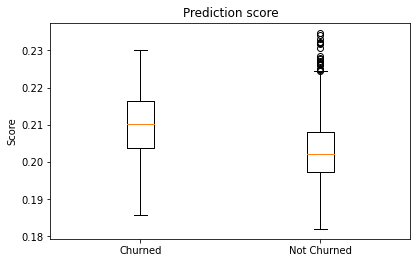


                    Churned  Not Churned
Outlier (min)     0.000000     0.224490
Outlier (max)     0.000000     0.234806
Outlier (avg)     0.000000     0.228646
Min               0.185692     0.182005
Max               0.230091     0.224354
Q1 (25%)          0.203867     0.197397
Q2 (50%, median)  0.210154     0.202264
Q3 (75%)          0.216343     0.208207 

             Pred. Not Churned  Pred. Churned
Not Churned               1206            389
Churned                    179            226 

Accuracy score: 0.716 (Correct: 1432, Incorrect: 568)

Total Churned: 405, Not Churned: 1595


In [347]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

plt.plot(np.arange(len(costs)), costs, color='blue')
plt.title('Logistic Regression (Cost per Iter.)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

y_pred_prob = model.predict(x_test)
y_pred, y_pred_divider = unit_step(y_pred_prob)

y_test_1 = list(map(lambda a: a[1], filter(lambda a: y_test[a[0]] == 1, enumerate(y_pred_prob))))
y_test_0 = list(map(lambda a: a[1], filter(lambda a: y_test[a[0]] == 0, enumerate(y_pred_prob))))

plt.plot(np.arange(len(y_pred_prob)), sorted(y_pred_prob), color='blue')
plt.axhline(y=y_pred_divider, color='orange', linestyle='-')
plt.title('Total Prediction score')
plt.show()

print('Divider: ', y_pred_divider)

plt.scatter(np.arange(len(y_test_1)), y_test_1, facecolors='none', edgecolors='green', s=5)
plt.axhline(y=y_pred_divider, color='orange', linestyle='-')
plt.title('Churned Prediction score')
plt.show()

plt.scatter(np.arange(len(y_test_0)), y_test_0, facecolors='none', edgecolors='red', s=5)
plt.axhline(y=y_pred_divider, color='orange', linestyle='-')
plt.title('Not Churned Prediction score')
plt.show()

fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylabel('Score')
ax.set_title('Prediction score')
ax.set_xticklabels(('Churned', 'Not Churned'))
bp = ax.boxplot([
    [p[0] for i, p in enumerate(y_pred_prob) if y_test[i] == 1],
    [p[0] for i, p in enumerate(y_pred_prob) if y_test[i] == 0], 
])
plt.show()

outliers = [flier.get_ydata() for flier in bp['fliers']]
medians = [median.get_ydata() for median in bp['medians']]
whiskers = [whiskers.get_ydata() for whiskers in bp['whiskers']]

print('\n', pd.DataFrame([
    list(map(lambda i: np.min(outliers[i]) if np.sum(outliers[i]) > 1 else 0, [0,1])),
    list(map(lambda i: np.max(outliers[i]) if np.sum(outliers[i]) > 1 else 0, [0,1])),
    list(map(lambda i: np.average(outliers[i]) if np.sum(outliers[i]) > 1 else 0, [0,1])),
    [whiskers[0][1], whiskers[2][1]],
    [whiskers[1][1], whiskers[3][1]],
    [whiskers[0][0], whiskers[2][0]],
    [medians[0][0], medians[1][0]],
    [whiskers[1][0], whiskers[3][0]]
], columns=['Churned', 'Not Churned'], index=['Outlier (min)', 'Outlier (max)', 'Outlier (avg)', 'Min', 'Max', 'Q1 (25%)', 'Q2 (50%, median)', 'Q3 (75%)']), '\n')

cm = confusion_matrix(y_test, y_pred)

print(pd.DataFrame(cm, columns=['Pred. Not Churned', 'Pred. Churned'], index=['Not Churned', 'Churned']), '\n')
print(f'Accuracy score: {accuracy_score(y_test, y_pred)} (Correct: {cm[0][0] + cm[1][1]}, Incorrect: {cm[0][1] + cm[1][0]})\n')
print(f'Total Churned: {len(list(filter(lambda a: a == 1, y_test)))}, Not Churned: {len(list(filter(lambda a: a == 0, y_test)))}')

## 4b. Train the 2-layer ANN model

With a rough idea like this,

<img src="http://media5.datahacker.rs/2018/08/tanh_sigma_activations.png" width="350" height="auto" />

(Source: [datahacker.rs, 2018](http://datahacker.rs/activation-functions-and-derivatives/))

In [375]:
from random import random

class ANN2Layer:
    
    def __init__(self, x_dimension, y_dimension, no_of_neurons=6):
        self.weights_L1 = np.random.randn(no_of_neurons, x_dimension) * (1 / (10 ** 5))
        self.weights_L2 = np.random.randn(y_dimension, no_of_neurons) * (1 / (10 ** 5))
        self.bias_L1 = np.zeros((no_of_neurons, 1))
        self.bias_L2 = np.zeros((y_dimension, 1))

    def activation_function_L1(self, x_values):
        return np.tanh(np.dot(self.weights_L1, x_values.T) + self.bias_L1)
    
    def activation_function_L2(self, A1):
        return sigmoid(np.dot(self.weights_L2, A1) + self.bias_L2)

    def forward_propagation(self, x_values):
        A1 = self.activation_function_L1(x_values)
        A2 = self.activation_function_L2(A1)
        return A1, A2

    def backward_propagation(self, x_values, y_values, A1, A2):
        A2_derivative = A2 - y_values

        weights_L2_derivative = np.array([np.dot(A2_derivative, v.T) / x_values.shape[1] for v in A1])        
        bias_L2_derivative = np.sum(A2_derivative, axis=1, keepdims=True) / x_values.shape[1]
        
        A1_derivative = np.dot(self.weights_L2.T, A2_derivative) * (1 - np.power(A1, 2))

        # Apply gradients to each x in each neuron
        x_values_gradients = np.array([[x_values[j] * A1_derivative[i][j] for j in range(x_values.shape[0])] for i in range(A1_derivative.shape[0])])
        # Apply sum divided by no of x rows
        x_values_hlc = np.array([[np.sum(x_values_gradients[i][:,j]) / x_values.shape[0] for j in range(x_values.shape[1])] for i in range(A1_derivative.shape[0])])

        weights_L1_derivative = x_values_hlc / x_values.shape[1]
        bias_L1_derivative = np.sum(A1_derivative, axis=1, keepdims=True) / x_values.shape[1]

        return (weights_L1_derivative, bias_L1_derivative), (weights_L2_derivative, bias_L2_derivative)

    def update_parameters(self, x_values, y_values, learning_rate=0.01, no_of_iterations=150):
        costs = []
        
        for i in range(no_of_iterations):
            A1, A2 = self.forward_propagation(x_values)
            cost = -np.sum(np.multiply(np.log(A2), y_values)) / y_values.shape[0]
            A1_gradients, A2_gradients = self.backward_propagation(x_values, y_values, A1, A2)

            self.weights_L1 = self.weights_L1 - learning_rate * A1_gradients[0]
            self.bias_L1 = self.bias_L1 - learning_rate * A1_gradients[1]
    
            self.weights_L2 = self.weights_L2 - learning_rate * A2_gradients[0]
            self.bias_L2 = self.bias_L2 - learning_rate * A2_gradients[1]

            print(f'Cost for iteration {i + 1}: {cost}')
            costs.append(cost)
            
        return A1_gradients, A2_gradients, costs
    
    def predict(self, x_values):
        return np.array([np.sum(self.forward_propagation(np.array([v]))[1]) / self.weights_L2.shape[0] for v in x_values])


model = ANN2Layer(x_train.shape[1], 1)
_, _, costs = model.update_parameters(x_train, y_train, no_of_iterations=250)


Cost for iteration 1: 0.14140202484467063
Cost for iteration 2: 2.5746566734480667
Cost for iteration 3: 2.0098488667147008
Cost for iteration 4: 1.9417883116047292
Cost for iteration 5: 1.9460428746253886
Cost for iteration 6: 1.9456864375546898
Cost for iteration 7: 1.9457158283494158
Cost for iteration 8: 1.9457134013473967
Cost for iteration 9: 1.9457136014634548
Cost for iteration 10: 1.945713584677903
Cost for iteration 11: 1.9457135857906191
Cost for iteration 12: 1.9457135854154781
Cost for iteration 13: 1.9457135851519598
Cost for iteration 14: 1.9457135848669318
Cost for iteration 15: 1.9457135845702656
Cost for iteration 16: 1.945713584259979
Cost for iteration 17: 1.9457135839350204
Cost for iteration 18: 1.9457135835942039
Cost for iteration 19: 1.9457135832362984
Cost for iteration 20: 1.9457135828600096
Cost for iteration 21: 1.9457135824639804
Cost for iteration 22: 1.9457135820467828
Cost for iteration 23: 1.945713581606914
Cost for iteration 24: 1.945713581142791
Cost

Cost for iteration 197: 1.9454361894708372
Cost for iteration 198: 1.9454186907251074
Cost for iteration 199: 1.9454000890486334
Cost for iteration 200: 1.9453803150584563
Cost for iteration 201: 1.9453592950234289
Cost for iteration 202: 1.9453369505936386
Cost for iteration 203: 1.9453131985132082
Cost for iteration 204: 1.945287950315476
Cost for iteration 205: 1.9452611119995038
Cost for iteration 206: 1.9452325836867959
Cost for iteration 207: 1.9452022592570595
Cost for iteration 208: 1.9451700259617528
Cost for iteration 209: 1.9451357640141276
Cost for iteration 210: 1.9450993461543717
Cost for iteration 211: 1.9450606371884045
Cost for iteration 212: 1.9450194934987945
Cost for iteration 213: 1.944975762526189
Cost for iteration 214: 1.9449292822195607
Cost for iteration 215: 1.9448798804535097
Cost for iteration 216: 1.9448273744107523
Cost for iteration 217: 1.9447715699278567
Cost for iteration 218: 1.9447122608021985
Cost for iteration 219: 1.9446492280580143
Cost for iter

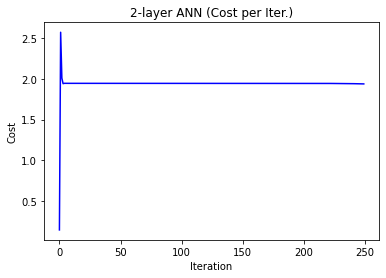

Divider:  0.20490011638190195  Min:  0.19969003326292936 Max:  0.21011019950087453 

             Pred. Not Churned  Pred. Churned
Not Churned               1216            379
Churned                    168            237 

Accuracy score: 0.7265 (Correct: 1453, Incorrect: 547)

Total Churned: 405, Not Churned: 1595


In [376]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

plt.plot(np.arange(len(costs)), costs, color='blue')
plt.title('2-layer ANN (Cost per Iter.)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

y_pred_prob = model.predict(x_test)
y_pred, y_pred_divider = unit_step(y_pred_prob)

print('Divider: ', y_pred_divider, ' Min: ', y_pred_prob.min(), 'Max: ', y_pred_prob.max(), '\n')

cm = confusion_matrix(y_test, y_pred)

print(pd.DataFrame(cm, columns=['Pred. Not Churned', 'Pred. Churned'], index=['Not Churned', 'Churned']), '\n')
print(f'Accuracy score: {accuracy_score(y_test, y_pred)} (Correct: {cm[0][0] + cm[1][1]}, Incorrect: {cm[0][1] + cm[1][0]})\n')
print(f'Total Churned: {len(list(filter(lambda a: a == 1, y_test)))}, Not Churned: {len(list(filter(lambda a: a == 0, y_test)))}')
